# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [32]:
import os
import re
import emoji
import pandas as pd
import numpy as np


from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [33]:
# Add any additional import statements you need here
import matplotlib.pyplot as plt


In [34]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "/Users/sahilwadhwa/M1 Results/twitter"
lyrics_folder = "/Users/sahilwadhwa/M1 Results/lyrics"

In [35]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens)) / len(tokens)
    num_characters = sum([len(i) for i in tokens]) 
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        token_counts = Counter(tokens).most_common(5)
        for token, count in token_counts:
            print(f"{token}: {count}")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [36]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
text: 3
here: 2
example: 2
is: 1
some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: It is beneficial to use assertion statements in your code because it helps debug your code early as well as helps to make your code more reliable.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [43]:
# Read in the lyrics data
lyrics_data = {}

for artist in os.listdir(lyrics_folder):
    join = os.path.join(lyrics_folder, artist)
    
    if os.path.isdir(join):
        lyrics_data[artist] = {}  
        for file in os.listdir(join):
            path = os.path.join(join, file)
            if os.path.isfile(path):
                with open(path, 'r', encoding='utf-8') as file:
                    read = file.read()
                    title = os.path.splitext(join)[0]  
                    lyrics_data[artist][title] = read

In [44]:
# Read in the twitter data

twitter_data = {}
for artist_file in os.listdir(twitter_folder):
    join = os.path.join(twitter_folder, artist_file)

    if os.path.isfile(join) and artist_file.endswith("_followers_data.txt"):
        artist = artist_file.replace("_followers_data.txt", "")
        twitter_data[artist] = []

        with open(join, 'r', encoding='utf-8') as f:
            for line in f:
                text = line.strip()
                twitter_data[artist].append(text)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [45]:
punctuation = set(punctuation) # speeds up comparison

punctuation = set(punctuation)
stop_words = set(stopwords.words("english"))

def clean(text):
    return [word.lower() for word in text.split()
            if word.lower() not in stop_words and all(char not in punctuation for char in word)]

In [46]:
# create your clean twitter data here
clean_twitter_data = {artist: [token for l in lines for token in clean(l)]
                      for artist, lines in twitter_data.items()}

In [47]:
# create your clean lyrics data here
clean_lyrics_data = {artist: [token for s in songs.values() for token in clean(s)]
                     for artist, songs in lyrics_data.items()}

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [48]:
#Stats for Lyrics
print("Descriptive Stats for Cher Lyrics:")
descriptive_stats(clean_lyrics_data['cher'])

print("\nDescriptive Stats for Robyn Lyrics:")
descriptive_stats(clean_lyrics_data['robyn'])

#Stats for Twitter
print("\nDescriptive Stats for Cher Twitter:")
descriptive_stats(clean_twitter_data['cher'])

print("\nDescriptive Stats for Robyn Twitter:")
descriptive_stats(clean_twitter_data['robynkonichiwa'])

Descriptive Stats for Cher Lyrics:
There are 62 tokens in the data.
There are 42 unique tokens in the data.
There are 264 characters in the data.
The lexical diversity is 0.677 in the data.
love: 6
time: 6
one: 4
wish: 3
know: 2

Descriptive Stats for Robyn Lyrics:
There are 54 tokens in the data.
There are 35 unique tokens in the data.
There are 256 characters in the data.
The lexical diversity is 0.648 in the data.
people: 6
never: 5
say: 5
lives: 2
scared: 2

Descriptive Stats for Cher Twitter:
There are 35713135 tokens in the data.
There are 9128198 unique tokens in the data.
There are 215899114 characters in the data.
The lexical diversity is 0.256 in the data.
0: 332354
1: 279778
2: 234441
love: 205713
3: 190345

Descriptive Stats for Robyn Twitter:
There are 3254733 tokens in the data.
There are 956855 unique tokens in the data.
There are 19218057 characters in the data.
The lexical diversity is 0.294 in the data.
0: 31626
1: 23729
2: 17483
3: 13938
sweden: 11589


[3254733, 956855, 0.29398878494795117, 19218057]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top 5 words would be different if we left the stopwords as the top 5 words would be a lot of basic words like "the" and "and"

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I didn't know these artists beforehand so I guessed that the lexical diversity between the artists would be pretty equal. Robyn has a higher lexical diversity in both the lyrics and Twitter data so it doesn't conform to my prior beliefs


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [49]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [50]:
# Your code here
emoji_top_10 = {}

for artist, descriptions in twitter_data.items():
    emojis = [char for d in descriptions for char in d if emoji.is_emoji(char)]
    emoji_top_10[artist] = Counter(emojis).most_common(10)

for artist, emoj in emoji_top_10.items():
    print(f"\nTop 10 most common emojis by {artist}:")
    for e, count in emoj:
        print(f"{e}: {count}")


Top 10 most common emojis by cher:
❤: 94506
🌈: 66291
♥: 48059
🏳: 47174
✨: 45846
🌊: 31234
💙: 31050
🏻: 25195
✌: 21963
💜: 21571

Top 10 most common emojis by robynkonichiwa:
🌈: 6086
❤: 5635
🏳: 4641
♥: 4249
✨: 3217
🏻: 1751
✌: 1495
♀: 1347
🏼: 1340
💙: 1200


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [51]:
# Your code here
hashtag_top_10 = {}

for artist, descriptions in twitter_data.items():
    hashtags = re.findall(r"#\w+", " ".join(descriptions))
    hashtag_top_10[artist] = Counter(hashtags).most_common(10)

for artist, hashes in hashtag_top_10.items():
    print(f"\nTop 10 most common hashtags by {artist}:")
    for h, count in hashes:
        print(f"{h}: {count}")


Top 10 most common hashtags by cher:
#BLM: 10100
#Resist: 6161
#BlackLivesMatter: 4888
#resist: 3860
#FBR: 3330
#1: 3111
#TheResistance: 3044
#blacklivesmatter: 2738
#Resistance: 1953
#RESIST: 1878

Top 10 most common hashtags by robynkonichiwa:
#BlackLivesMatter: 356
#BLM: 345
#1: 228
#blacklivesmatter: 222
#music: 175
#Music: 114
#EDM: 87
#LGBTQ: 76
#blm: 60
#TeamFollowBack: 59


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [52]:
# Your code here
most_common_words = {}

for artist, songs in lyrics_data.items():
    words = []
    for song in songs.values():
        first = song.strip().split("\n")[0]
        words.extend([w.lower() for w in first.split() if w.lower() not in stop_words and w not in punctuation])
    most_common_words[artist] = Counter(words).most_common(5)

for artist, words in most_common_words.items():
    print(f"\nTop 5 most common words in song titles by {artist}:")
    for w, count in words:
        print(f"{w}: {count}")


Top 5 most common words in song titles by robyn:
"play": 1

Top 5 most common words in song titles by cher:
"classified: 1
1a": 1


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

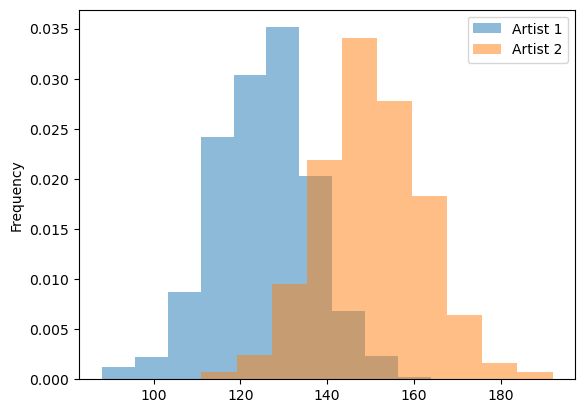

In [53]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression `'\s+'` matches any sequence of whitespace characters


In [54]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

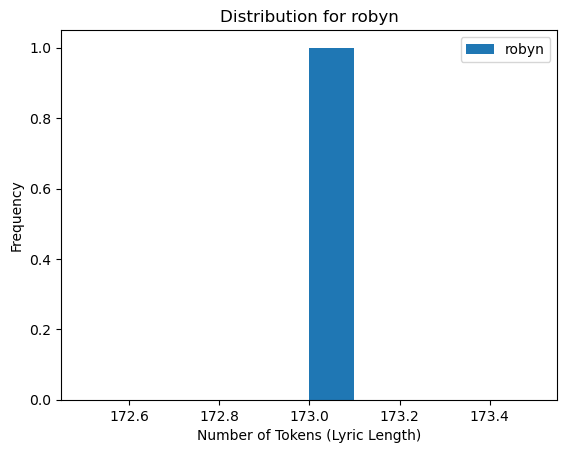

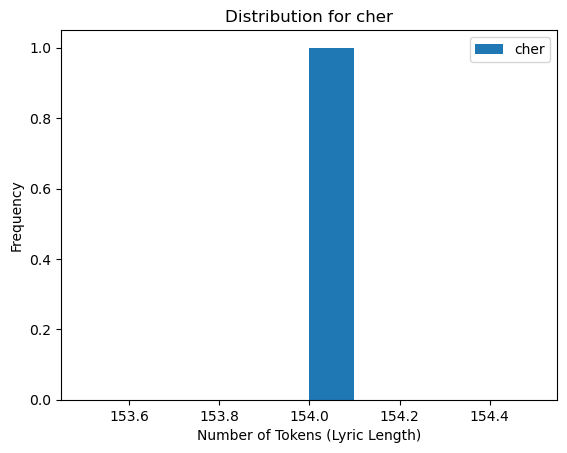

In [55]:
# Your lyric length comparison chart here. 
lyric_lengths = {}

for artist, songs in lyrics_data.items():
    lyric_lengths[artist] = []
    for song_item, song_val in songs.items():
        token = tokenize_lyrics(song_val)
        lyric_lengths[artist].append(len(token))

for artist, lengths in lyric_lengths.items():
    plt.hist(lengths,  label = artist)
    plt.title(f"Distribution for {artist}")
    plt.xlabel("Number of Tokens (Lyric Length)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()